# task 4

Make sure that you've all demanding libraries in your vienv, babe

In [1]:
import pandas as pd
import numpy as np

In [22]:
data = pd.read_csv('/home/alexey/Downloads/task4_2_859501 (1).csv')

In [23]:
data.head()

,ID,DISTANCE,STOP_COUNT,COST,FITNESS,INTERNET
0,1,15,7,38000,27,4
1,2,18,10,54000,9,1
2,3,24,12,50000,23,2
3,4,3,9,38000,9,3
4,5,6,1,43000,22,2


In [24]:
features = ["DISTANCE", "STOP_COUNT", "COST", "FITNESS", "INTERNET"]

In [25]:
# lin_norm: (x - x_min) / (x_max - x_min)

In [26]:
data = data[data.INTERNET != 0]

In [27]:
# make normalization
for feature in features:
    data[feature] = (data[feature] - data[feature].min()) / (data[feature].max() - data[feature].min())

In [32]:
weights = np.array([1, 1, 1, 0.3, -0.2])

In [33]:
data["RATE"] = data[features].dot(weights)

In [34]:
data.sort_values(by="RATE", ascending=True).head()

,ID,DISTANCE,STOP_COUNT,COST,FITNESS,INTERNET,RATE
96,97,0.230769,0.090909,0.179487,0.000000,0.666667,0.367832
86,87,0.000000,0.454545,0.076923,0.076923,0.666667,0.421212
55,56,0.115385,0.181818,0.025641,1.000000,0.666667,0.489510
187,188,0.307692,0.000000,0.205128,0.423077,0.666667,0.506410
13,14,0.230769,0.090909,0.153846,0.846154,1.000000,0.529371


# task 5

In [35]:
data = data = pd.read_csv('/home/alexey/Downloads/task5_963811.csv')

In [38]:
alpha = 0.21

***part 1***

$t > 1: s_t = s_{t-1} + a*(c_t-s_{t-1})$

In [52]:
def exponential_smoothing(series, alpha):
    result = [series.iloc[0].item()]
    for n in range(1, len(series)):
        result.append(alpha * series.iloc[n].item() + (1 - alpha) * result[n-1])
    return np.array(result)

In [54]:
smoothed = exponential_smoothing(data, alpha)

In [60]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (14, 7)

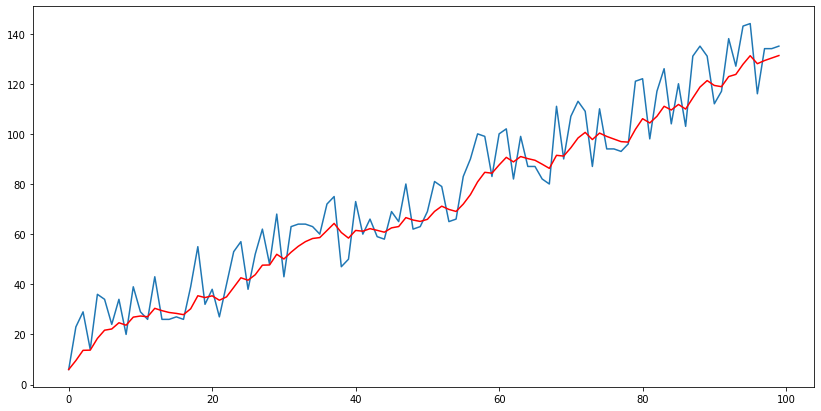

In [63]:
plt.plot(data)
plt.plot(smoothed, color="red")
None

***part 2***

In [79]:
round(smoothed[99], 2)

131.25

In [67]:
smoothed

(100,)

In [81]:
from sklearn.linear_model import LinearRegression

In [87]:
regression = LinearRegression()

In [84]:
X = np.arange(0, 100)

In [93]:
data["y"].shape

(100,)

In [94]:
regression.fit(X.reshape(-1, 1), data["y"].T)

LinearRegression()

In [96]:
predicts = regression.predict(X.reshape(-1, 1))

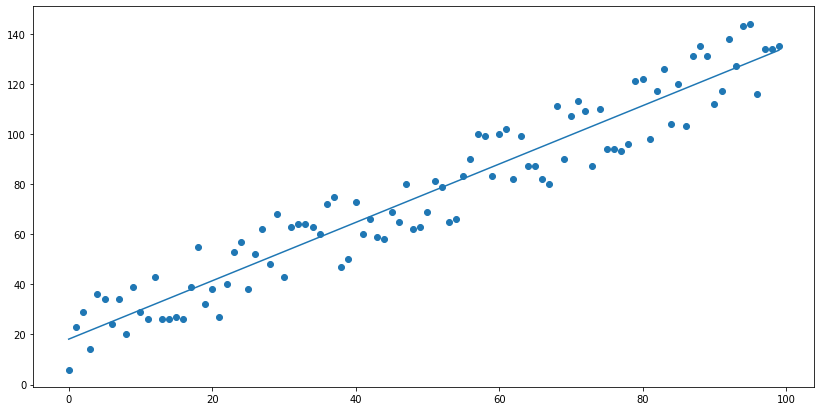

In [100]:
plt.plot(predicts)
plt.scatter(X.reshape(-1, 1), data["y"])
None

***part 3***

In [103]:
round(regression.coef_[0], 2)

1.16

In [104]:
from sklearn.metrics import r2_score

***part 4***

In [105]:
round(r2_score(data["y"], predicts), 2)

0.92

***part 5***

In [109]:
round(regression.predict(np.array([101]).reshape(-1, 1))[0], 2)

135.68